In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 로드
df = pd.read_csv('/workspaces/ml202401-midterm-stevenwkd/MID/a.csv', encoding='cp949')

#문제정의 : 한국철도공사 5대도시 관광지 방문자의 연령및 거주지역 데이터를 기반으로한 연령대별 인기 관광지 분석

In [5]:
df.head()

,방문지역,연령대,관광지,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,강릉,20대,합계(중복제외),30.02,1.59,1.76,5.81,1.04,1.94,0.64,0.30,33.84,10.49,4.20,2.48,1.14,0.87,2.02,1.61,0.24
1,강릉,20대,강릉교동,25.13,1.62,1.71,4.80,0.84,2.01,0.52,0.27,29.12,21.10,4.73,1.78,0.90,0.83,2.66,1.55,0.43
2,강릉,20대,강릉역앞,29.57,1.72,1.97,6.95,1.32,2.51,0.64,0.25,33.98,8.99,4.26,2.18,1.07,0.64,2.40,1.47,0.07
3,강릉,20대,강문해변,36.73,1.18,1.82,5.77,0.85,2.15,0.52,0.27,34.93,5.37,3.37,2.44,1.03,0.58,1.55,1.38,0.06
4,강릉,20대,경포호,30.08,1.30,1.39,6.17,0.87,1.86,0.67,0.34,37.71,6.28,5.34,2.81,1.16,0.75,1.75,1.34,0.17


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_fi

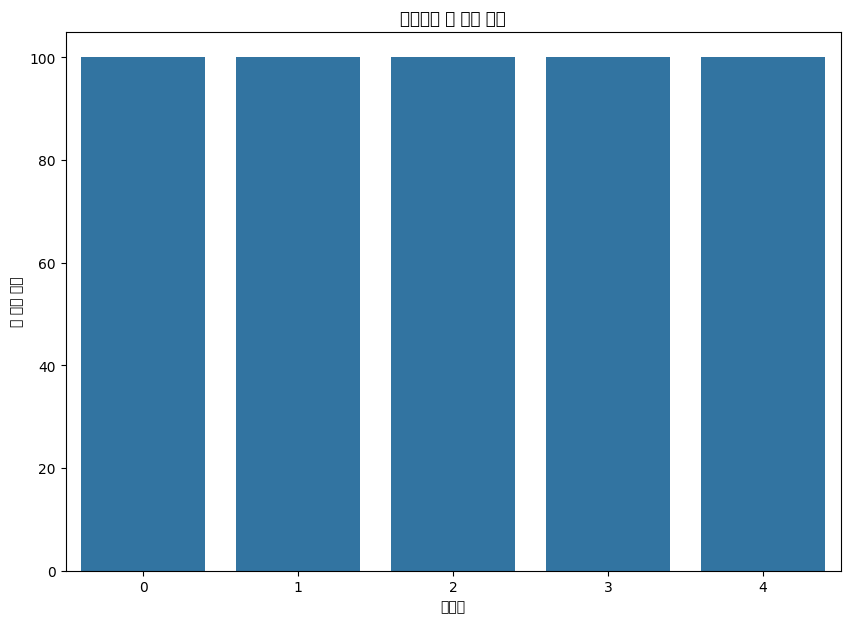

In [25]:
# 결측치 처리
df.dropna(inplace=True)

# 관심 있는 데이터 선택 (예: 방문지역, 연령대, 방문 비율 포함된 컬럼들)
interest_columns = ['방문지역', '연령대'] + [col for col in df.columns if '비율' in col or col in ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']]
df = df[interest_columns]

# 총 방문 비율 계산
df['total_visit'] = df.loc[:, '서울':'제주'].sum(axis=1)

# 연령대 및 방문지역 레이블 인코딩
le = LabelEncoder()
df['연령대'] = le.fit_transform(df['연령대'])
df['방문지역'] = le.fit_transform(df['방문지역'])

# 데이터 정규화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.loc[:, df.columns != '방문지역'])

# 연령대별 방문 비율 바 차트
plt.figure(figsize=(10, 7))
sns.barplot(x='연령대', y='total_visit', data=df)
plt.title('연령대별 총 방문 비율')
plt.xlabel('연령대')
plt.ylabel('총 방문 비율')
plt.show()

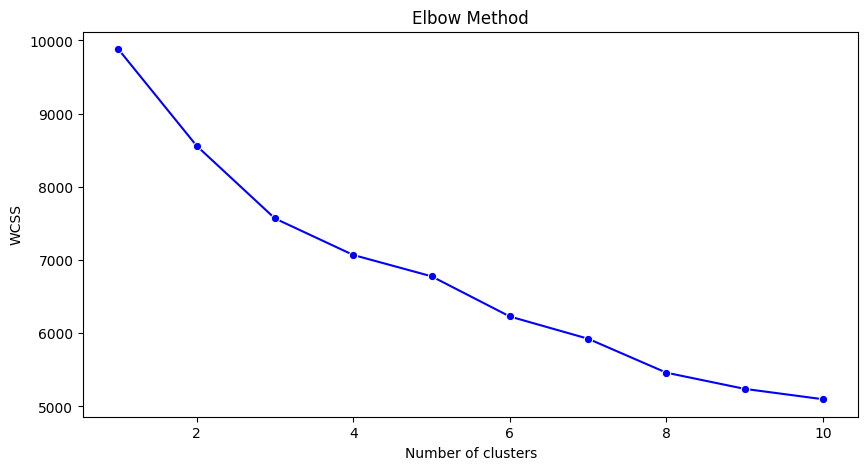

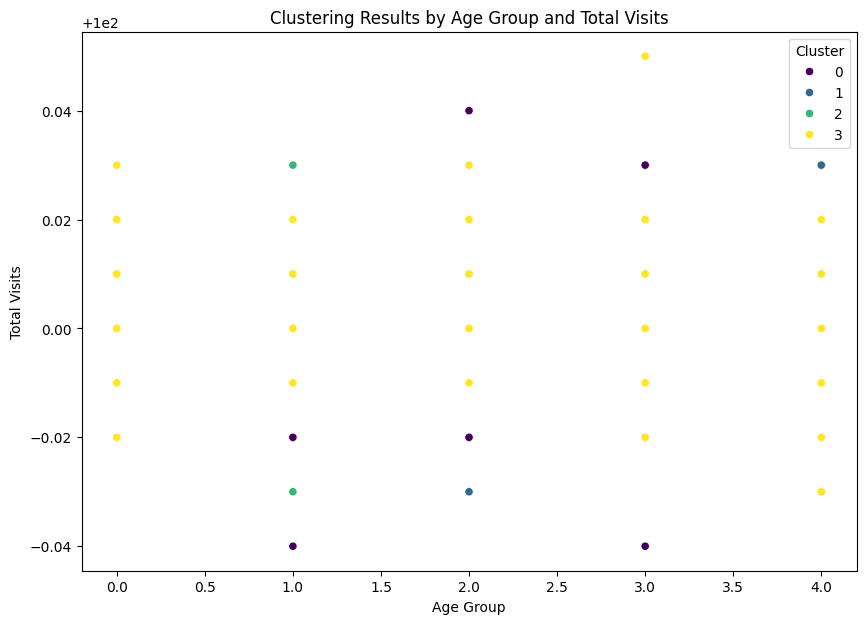

Silhouette Score: 0.22


In [26]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 결정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# WCSS 그래프 표시
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 최적 클러스터 수로 K-means 클러스터링 수행
optimal_clusters = 4  # 예시로 4를 사용
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# 클러스터 결과 추가
df['Cluster'] = clusters

# 클러스터 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='연령대', y='total_visit', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results by Age Group and Total Visits')
plt.xlabel('Age Group')
plt.ylabel('Total Visits')
plt.show()

# 실루엣 점수 계산
score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score:.2f}')
